<a href="https://colab.research.google.com/github/08989/code-alpha/blob/main/code_alpha_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 3: Car Price Prediction with Machine Learning

NAME : PARTH BHADAURIA

BATCH : JULY

DOMAIN : DATA SCIENCE

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving car data.csv to car data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
df = df.drop('Car_Name', axis=1)
df.head()


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.967552085183516
MSE: 0.7474566842622952


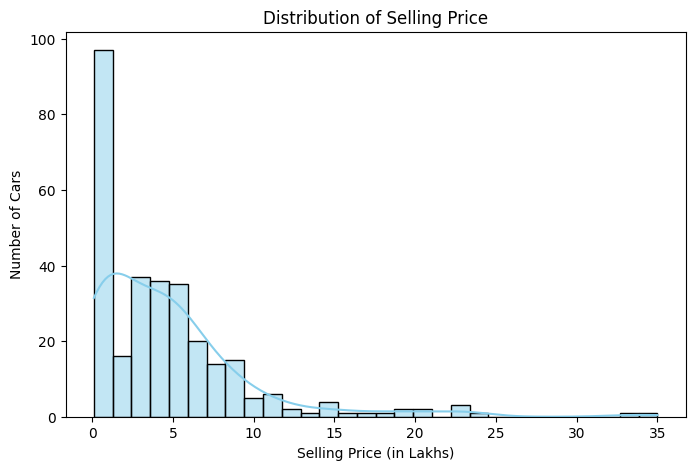

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Number of Cars')
plt.show()


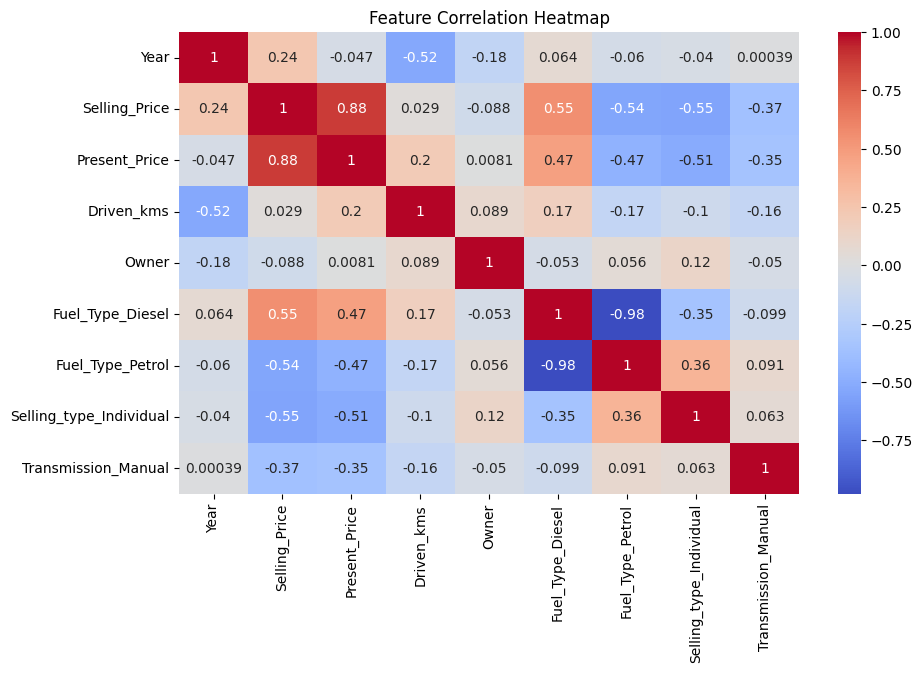

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


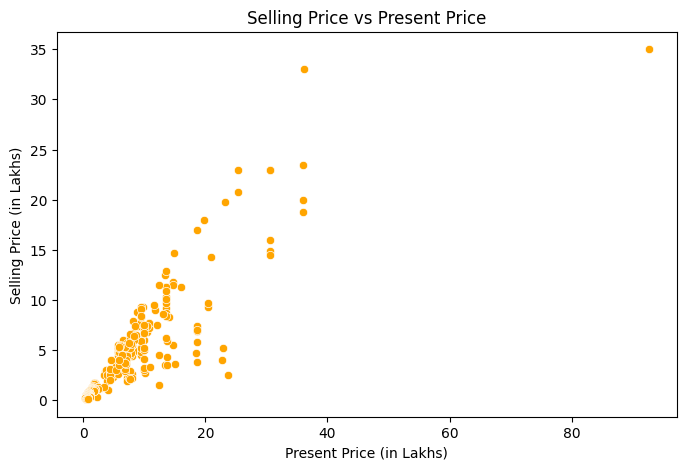

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, color='orange')
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price (in Lakhs)')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()


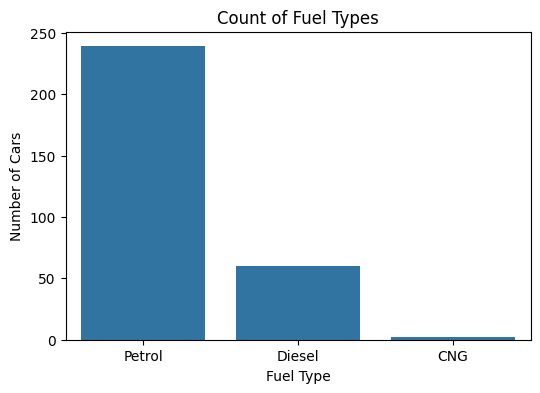

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Fuel_Type', data=pd.read_csv('car data.csv'))  # Use original before get_dummies
plt.title('Count of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()


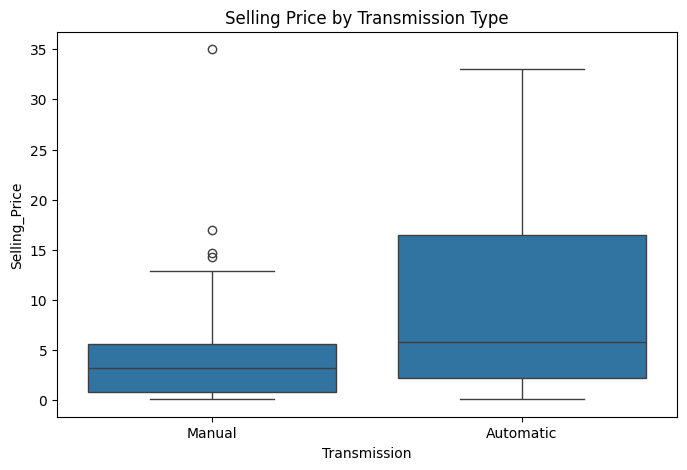

In [ ]:
original_df = pd.read_csv('car data.csv')  # Reload to use original column names
plt.figure(figsize=(8, 5))
sns.boxplot(x='Transmission', y='Selling_Price', data=original_df)
plt.title('Selling Price by Transmission Type')
plt.show()
